<a href="https://colab.research.google.com/github/Philemonkipkirui/Data-Science/blob/main/Solar_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Analyzing Solar Generation and solar Usage**

This is a project that analyzes solar electricity generation, electricity usage, and battery usage data to understand the potential benefits of using a battery system to store excess solar electricity.

In [110]:
#Analyzing Solar Generation and solar Usage

In [111]:
from google.colab import drive
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [112]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
df = pd.read_excel('/content/drive/MyDrive/Solar Energy Data.xlsx')
#df = pd.read_excel('/content/drive/MyDrive/Solar Energy Data.xlsx', skiprows =2) .Skips the firs two rows of the dataframe.

**Data Cleaning**

In [114]:
df.head(10)

,Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,NaN,DATA,DATA
1,Hour,Date/hour start,Solar electricity generation (kWh),Electricity usage (kWh)
2,0,2020-01-01 00:00:00,0,1.509849
3,1,2020-01-01 01:00:00,0,1.411859
4,2,2020-01-01 02:00:00,0,1.023898
5,3,2020-01-01 03:00:00,0,0.642
6,4,2020-01-01 04:00:00,0,0.96
7,5,2020-01-01 05:00:00,0.012,0.897
8,6,2020-01-01 06:00:00,0.006,0.648
9,7,2020-01-01 07:00:00,0.009,0.774


In [115]:
df.columns

Index([' Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.',
       'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3'],
      dtype='object')

In [116]:
#Dropping the rows with index 0 and 1

df.drop(labels=[df.index[0],df.index[1]], inplace = True)
df.reset_index(drop = True, inplace = True)

Renaming the columns.

In [117]:
df.rename(columns = {' Hour 0 represents the hour from midnight to 01:00 and hour 23 represents the hour from 23:00 to midnight.' : 'Hour'}, inplace= True)
df.rename(columns = {'Unnamed: 1' : 'Date_Hour'}, inplace= True)
df.rename(columns = {'Unnamed: 2' : 'Solar_electricity_generation'}, inplace= True)
df.rename(columns = {'Unnamed: 3' : 'Electricity_usage'}, inplace= True)
df.columns


Index(['Hour', 'Date_Hour', 'Solar_electricity_generation',
       'Electricity_usage'],
      dtype='object')

In [118]:
df['Date_Hour'] =pd.to_datetime(df['Date_Hour'][1:], format = '%d,%m, %y', errors ='coerce')
df['Hour'] =df['Hour'].fillna(0).astype(int)
df['Solar_electricity_generation'] = df['Solar_electricity_generation'].replace('DATA', 0).astype(int)
df['Electricity_usage'] = df['Electricity_usage'].astype(int)
df.columns


Index(['Hour', 'Date_Hour', 'Solar_electricity_generation',
       'Electricity_usage'],
      dtype='object')

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Hour                          8760 non-null   int64         
 1   Date_Hour                     8759 non-null   datetime64[ns]
 2   Solar_electricity_generation  8760 non-null   int64         
 3   Electricity_usage             8760 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 273.9 KB


Checking For Duplicate values


In [120]:
df.duplicated().sum()

0

Finding Outliers.

In [121]:
df['Z_score'] = np.abs(stats.zscore(df['Electricity_usage']))
#df.head()
outliers = df[df['Z_score']>3]
print(outliers)


     Hour           Date_Hour  Solar_electricity_generation  \
276    12 2020-01-12 12:00:00                             5   

     Electricity_usage    Z_score  
276              46000  93.585399  


In [122]:
for outlier in outliers['Electricity_usage']:
  df['Electricity_usage'] = df['Electricity_usage'].replace( outlier, df['Electricity_usage'].mean())

In [123]:
df.head(20)

,Hour,Date_Hour,Solar_electricity_generation,Electricity_usage,Z_score
0,0,NaT,0,1.0,0.011983
1,1,2020-01-01 01:00:00,0,1.0,0.011983
2,2,2020-01-01 02:00:00,0,1.0,0.011983
3,3,2020-01-01 03:00:00,0,0.0,0.014018
4,4,2020-01-01 04:00:00,0,0.0,0.014018
5,5,2020-01-01 05:00:00,0,0.0,0.014018
6,6,2020-01-01 06:00:00,0,0.0,0.014018
7,7,2020-01-01 07:00:00,0,0.0,0.014018
8,8,2020-01-01 08:00:00,0,1.0,0.011983
9,9,2020-01-01 09:00:00,0,0.0,0.014018


**Comparing the average solar electricity generation and electricity usage for each hour in a day**

In [124]:
df.describe()

,Hour,Date_Hour,Solar_electricity_generation,Electricity_usage,Z_score
count,8760.000000,8759,8760.000000,8760.000000,8760.000000
mean,11.500000,2020-07-02 08:07:22.242265088,0.894635,1.638686,0.023717
min,0.000000,2020-01-01 01:00:00,0.000000,-12.000000,0.000226
25%,5.750000,2020-04-02 06:30:00,0.000000,0.000000,0.011983
50%,11.500000,2020-07-02 12:00:00,0.000000,0.000000,0.014018
75%,17.250000,2020-10-01 17:30:00,1.000000,1.000000,0.014018
max,23.000000,2020-12-31 23:00:00,13.000000,61.000000,93.585399
std,6.922582,NaN,1.891320,4.617512,0.999776


In [125]:
hourly_avg = df.groupby('Hour')[['Solar_electricity_generation', 'Electricity_usage']].agg([ 'mean','min', 'max'])
print(hourly_avg)

     Solar_electricity_generation         Electricity_usage            
                             mean min max              mean   min   max
Hour                                                                   
0                        0.000000   0   0          0.383562   0.0  14.0
1                        0.035616   0  13          0.084932   0.0   4.0
2                        0.000000   0   0          0.013699   0.0   1.0
3                        0.000000   0   0          0.063014   0.0   3.0
4                        0.002740   0   1          0.183562   0.0   7.0
5                        0.126027   0   5          0.235616   0.0   9.0
6                        0.460274   0   5          1.643836   0.0  29.0
7                        1.019178   0   6          1.309589   0.0  26.0
8                        1.758904   0   7          1.361644  -1.0  26.0
9                        2.473973   0   9          1.268493   0.0  27.0
10                       3.002740   0  10          1.427397   0.

<Axes: xlabel='Hour'>

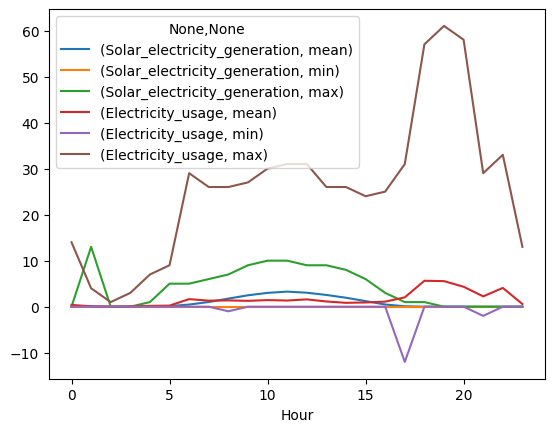

In [126]:
hourly_avg.plot(kind = 'line')


**Calculating Electricity Bought**

The project calculates the electricity needed to be bought from the provider by subtracting the solar electricity generation from the electricity usage

In [127]:
 df['Electricity_bought'] = np.maximum( 0 , df['Electricity_usage']-df['Solar_electricity_generation'])

**Calculating Excess Solar Generation**

In [128]:
 df['Excess_solar'] = np.maximum( 0 , df['Solar_electricity_generation']-df['Electricity_usage'])

# **Modeling Battery Charge Level**

The project assumes a maximum battery capacity of 12.5 kWh. The battery charge level is updated iteratively using a loop that considers the excess solar electricity generated and limits the charging to the battery's maximum capacity.

In [129]:
max_battery_capacity = int(12.5)  # kWh
df['Battery Charge Level'] = 0
for index, row in df.iterrows():
    excess_generation = row['Excess_solar']
    battery_charge = min(max_battery_capacity - row['Battery Charge Level'], excess_generation)
    df.at[index, 'Battery Charge Level'] = row['Battery Charge Level'] + battery_charge

**Calculating Electricity Bought with Battery**


The electricity bought when using the battery is calculated by subtracting the excess solar generation from the previously calculated electricity bought. This accounts for the electricity stored in the battery that can be used instead of buying from the provider

In [130]:
 df['Elecrticity_bought_battery'] = np.maximum( 0 , df['Electricity_bought'] - df['Excess_solar'])

 **Calculating Savings from Installing a Battery**

To quantify the potential savings from installing a battery, the project calculates the cost difference between buying electricity from the provider without a battery and buying electricity with a battery. The electricity price is assumed to be $0.17 per kWh.

In [131]:
electricity_price = int(0.17)
df['Battery_saving'] = np.maximum (0 , df['Electricity_bought']*electricity_price - df['Elecrticity_bought_battery']*electricity_price)

**Data Aggregation and Visualization**

The project aggregates the data on a monthly basis to provide a broader perspective. The aggregated values include total solar generation, electricity usage, electricity bought without a battery, and electricity bought with a battery.

In [132]:
df['Month'] = df['Date_Hour'].dt.month
Monthly_data = df.groupby('Month').agg({
    'Solar_electricity_generation': 'sum',
    'Electricity_usage': 'sum',
    'Electricity_bought': 'sum',
    'Elecrticity_bought_battery' :'sum'
}).reset_index()
print(Monthly_data)

    Month  Solar_electricity_generation  Electricity_usage  \
0     1.0                           172        1373.889041   
1     2.0                           328        1267.000000   
2     3.0                           448        1478.000000   
3     4.0                           731        1411.000000   
4     5.0                          1427         665.000000   
5     6.0                          1190         869.000000   
6     7.0                          1143         902.000000   
7     8.0                           954        1163.000000   
8     9.0                           662        1304.000000   
9    10.0                           400        1108.000000   
10   11.0                           266        1166.000000   
11   12.0                           116        1647.000000   

    Electricity_bought  Elecrticity_bought_battery  
0          1350.889041                 1350.889041  
1          1201.000000                 1201.000000  
2          1428.000000            

**Visualization**

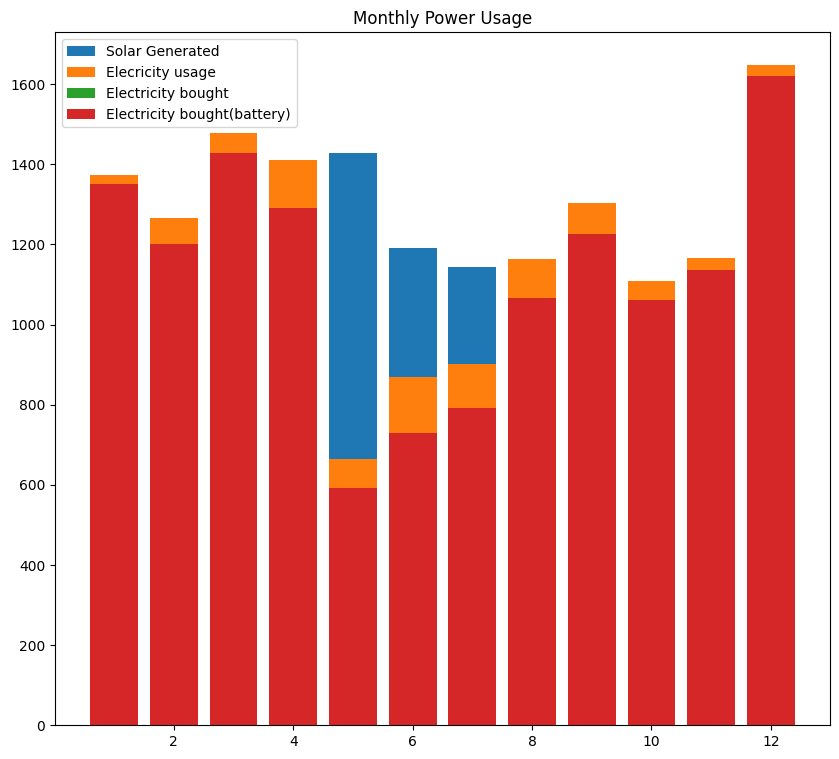

In [134]:
plt.figure(figsize = (10, 9))
plt.bar(Monthly_data['Month'], Monthly_data['Solar_electricity_generation'], label = 'Solar Generated')
plt.bar(Monthly_data['Month'], Monthly_data['Electricity_usage'], label = 'Elecricity usage')
plt.bar(Monthly_data['Month'], Monthly_data['Electricity_bought'], label = 'Electricity bought')
plt.bar(Monthly_data['Month'], Monthly_data['Elecrticity_bought_battery'], label = 'Electricity bought(battery)')
#plt.xlabel('Month')
#plt.ylabel('KWH')
plt.legend()
plt.title('Monthly Power Usage')
plt.show()